In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import zscore

Learning about the data

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

Drop columns which are not required

In [8]:
df = df.drop(columns=['area_type', 'availability', 'society', 'balcony'])
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


Handling NA values

In [9]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

since the na rows are so less, we might as well just drop them all

In [10]:
df.shape

(13320, 5)

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df.shape

(13246, 5)

In [14]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

BHK and Bedroom are the same thing, so we'll have to fix this

In [15]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df

C:\Users\aarya\AppData\Local\Temp\ipykernel_5596\384187086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [16]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
type(df['total_sqft'])

pandas.core.series.Series

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


We have to deal with the ranges in the total_sqft and also with entries like '34.46Sq. Meter' . So for ranges, we will take the average and for the latter, we will just ignore those rows.

In [22]:
def convert_sqft_to_num(x):
    values = x.split('-')
    try:
        return float(x)
    except:
        if len(values) == 2:
            return (float(values[0])+float(values[1]))//2
        else:
            return None

In [23]:
df1 = df.copy()
df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_to_num)
df1 = df1[df1['total_sqft'].notnull()]
df1 

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


Now, we'll be adding a price per sqaure feet column

In [24]:
df1['price_per_sqft'] = df1['price']*100000/df1['total_sqft']
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
df1['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920769e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

We'll now be trying to apply dimensionality reduction techniques to reduce the no. of locations

In [26]:
len(df1['location'].unique())

1298

In [27]:
# First we'll be removing any whitespace at start or end
# to make sure our data is clean
df1['location'] = df1['location'].apply(lambda x: x.strip())

In [28]:
loc_stats = df1['location'].value_counts(ascending=False)
loc_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [29]:
loc_stats.values.sum()

13200

In [30]:
len(loc_stats)

1287

In [31]:
len(loc_stats[loc_stats>10])

240

Let's put the locations with less than 10 datapoints as "other" location.\
Dimensionality Reduction

In [32]:
other_loc = loc_stats[loc_stats <= 10]
other_loc

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [33]:
df1['location'] = df1['location'].apply(lambda x: 'other' if x in other_loc else x)
df1.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [34]:
len(df1['location'].unique())

241

Outlier Removal with business logic. \
Generally sqft per bedroom is minimum 300. So we will remove any apartments which fall below this level, considering them as an outlier.

In [35]:
df1.shape

(13200, 7)

In [36]:
df1[(df1['total_sqft']/df['bhk'])<300]

C:\Users\aarya\AppData\Local\Temp\ipykernel_5596\177185973.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[(df1['total_sqft']/df['bhk'])<300]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [37]:
df2 = df1[~(df1['total_sqft']/df['bhk']<300)]
df2.shape

C:\Users\aarya\AppData\Local\Temp\ipykernel_5596\277275075.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[~(df1['total_sqft']/df['bhk']<300)]


(12456, 7)

In [38]:
df2['price_per_sqft'].describe()

count     12456.000000
mean       6308.513707
std        4168.123545
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<AxesSubplot: xlabel='price_per_sqft', ylabel='Count'>

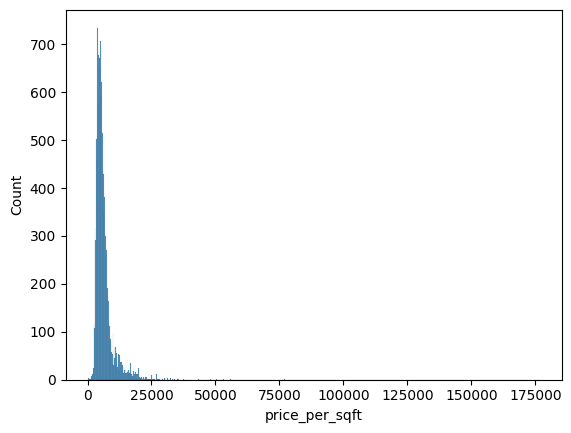

In [39]:
sns.histplot(data=df2, x=df2['price_per_sqft'])

The Data seems normally distributed with alot of outliers. Lets use the Z-Score method to get rid of the outliers.\
Threshold z value of 1 seems good.

In [40]:
def remove_outliers(df):
    new_df = df.copy()
    new_df['z-scores'] = zscore(new_df['price_per_sqft'])
    new_df = new_df[(new_df['z-scores']>=-1) & (new_df['z-scores']<=1)]
    new_df = new_df.drop(columns='z-scores')
    return new_df

df3 = remove_outliers(df2)
df3
    


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [41]:
df3.shape

(11294, 7)

In [42]:
df3['price_per_sqft'].describe()

count    11294.000000
mean      5371.351321
std       1667.324909
min       2149.277061
25%       4123.711340
50%       5092.388055
75%       6363.636364
max      10476.190476
Name: price_per_sqft, dtype: float64

<AxesSubplot: xlabel='price_per_sqft', ylabel='Count'>

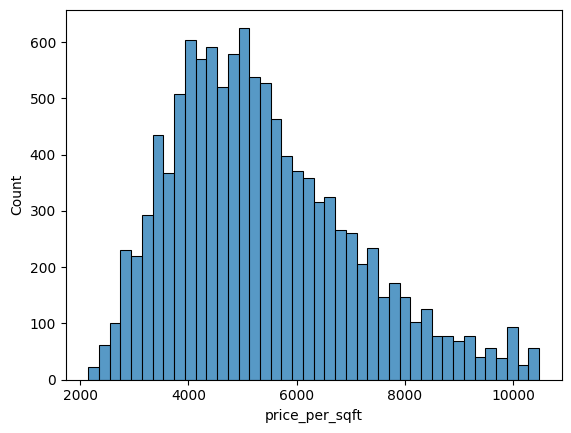

In [43]:
sns.histplot(data=df3, x=df3['price_per_sqft'])

For a particular location, lets compare 2BHK and 3BHK Prices

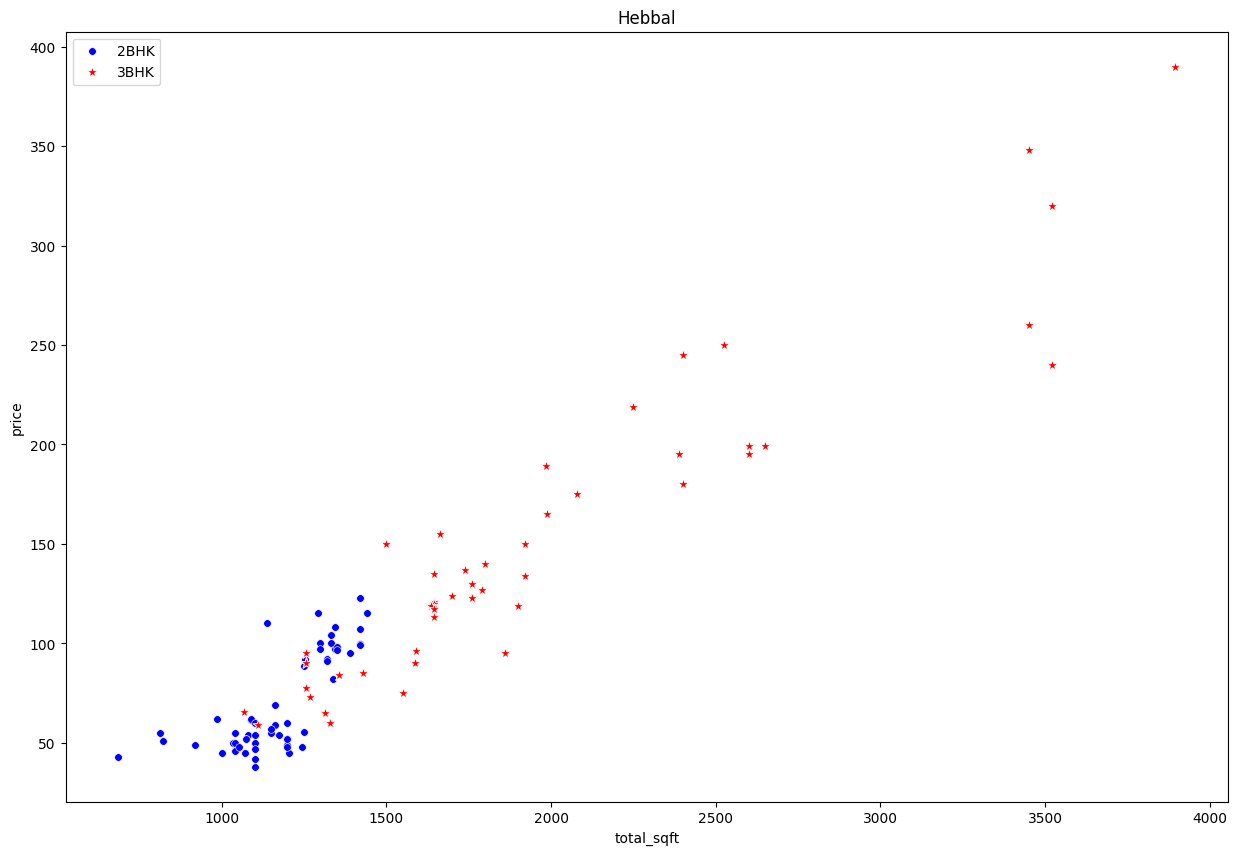

In [44]:
def plot_scatter(df,loc):
    bhk2 = df[(df.location == loc) & (df.bhk==2)]
    bhk3 = df[(df.location == loc) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    sns.scatterplot(data= bhk2, x=bhk2.total_sqft, y=bhk2.price, color='blue',s=30)
    sns.scatterplot(data= bhk3, x=bhk3.total_sqft, y=bhk3.price, color='red', marker='*', s=70)
    plt.legend(labels=('2BHK','3BHK'))
    plt.title(loc)
plot_scatter(df3,'Hebbal')

In [45]:
df3[df3['price_per_sqft']>5258.545136].index

Int64Index([    3,     6,    14,    15,    18,    21,    23,    30,    32,
               34,
            ...
            13295, 13298, 13299, 13300, 13307, 13308, 13309, 13314, 13315,
            13318],
           dtype='int64', length=5205)

In [46]:
df3[df3['price_per_sqft']>5258.545136].index.values

array([    3,     6,    14, ..., 13314, 13315, 13318], dtype=int64)

It is wierd for a 3BHK to cost less than a 2BHK for the same location and for the same area. Hence we will also remove these exceptions.\
We will be removing datapoints which have value less than mean of the smaller BHK

In [47]:
def exclude_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {'mean': np.mean(bhk_df.price_per_sqft),
                              'count': bhk_df.shape[0]
                            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df4 = exclude_bhk(df3)
df4.shape

(8087, 7)

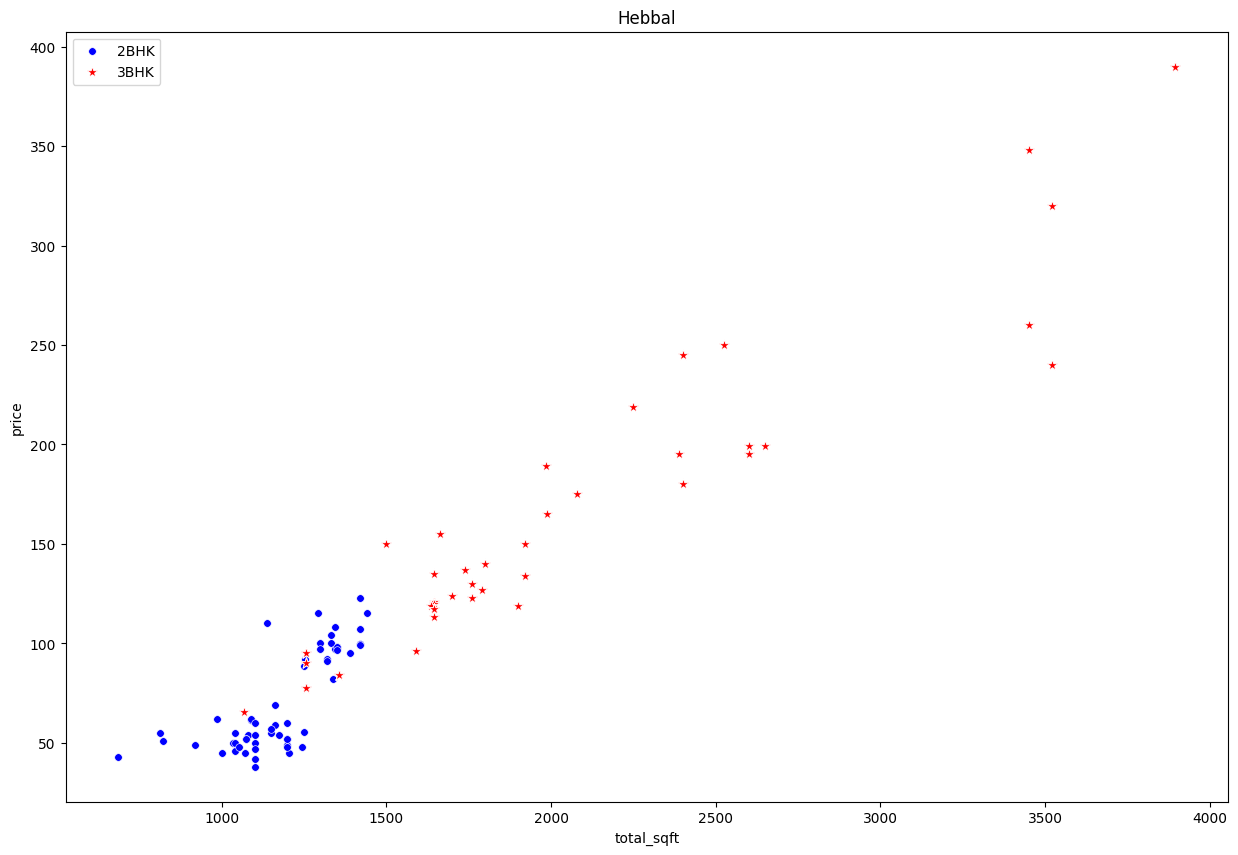

In [48]:
plot_scatter(df4,"Hebbal") 

Generally, total bathrooms = total bedrooms + 1max, any more seems suspicious

In [49]:
df4[df4.bath>df4.bhk+1]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
84,EPIP Zone,3 BHK,1499.0,5.0,102.0,3,6804.536358
337,Thigalarapalya,4 BHK,3122.0,6.0,230.0,4,7367.072389
490,Old Madras Road,5 BHK,4500.0,7.0,337.0,5,7488.888889
524,Jakkur,4 BHK,5230.0,6.0,465.0,4,8891.013384
550,Hebbal,3 BHK,3450.0,5.0,260.0,3,7536.231884
...,...,...,...,...,...,...,...
12366,other,3 Bedroom,5656.0,5.0,499.0,3,8822.489392
12544,Hebbal,4 BHK,4225.0,6.0,359.0,4,8497.041420
13095,other,4 BHK,6652.0,6.0,660.0,4,9921.828022
13119,other,4 Bedroom,6688.0,6.0,700.0,4,10466.507177


In [50]:
df5 = df4[df4.bath<df4.bhk+2]
df5.shape

(8007, 7)

In [51]:
df6 = df5.drop(columns=['size','price_per_sqft'])
df6.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
6,Old Airport Road,2732.0,4.0,204.00,4


Now that data cleaning is done.\
Lets do One Hot Encoding for locations

In [52]:
dummies = pd.get_dummies(df6['location'])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df7 = pd.concat([df6,dummies],axis='columns')
df7

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Old Airport Road,2732.0,4.0,204.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,57.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,Green Glen Layout,1715.0,3.0,112.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,Padmanabhanagar,4689.0,4.0,488.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df7 = df7.drop(['location','other'],axis = 'columns')
df7

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,1345.0,2.0,57.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,1715.0,3.0,112.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,60.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,488.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's start building a model now

In [55]:
X = df7.drop(columns=['price'])
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,1345.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,1715.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y = df7.price
y

0         39.07
2         62.00
3         95.00
4         51.00
6        204.00
          ...  
13313     57.00
13314    112.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 8007, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [59]:
model.score(X_test,y_test)

0.8529566601801203

Using K Fold cross validation to measure accuracy of our LinearRegression model

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
num = cross_val_score(LinearRegression(),X,y,cv=cv)
num

array([ 8.26700503e-01, -6.19317983e+14,  8.86549960e-01,  8.09259577e-01,
       -9.51410584e+14])

Finding the best model using GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model = find_best_model_using_gridsearchcv(X,y)

c:\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Python\Python39\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    v

In [64]:
best_model

,model,best_score,best_params
0,linear_regression,0.815908,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.792022,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.735282,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [68]:
best_model['best_params'][0]

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

In [70]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [71]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.19818270431784

In [72]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.53264930795784

In [73]:
predict_price('Indira Nagar',1000, 2, 2)

c:\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.19637709021532

Export the tested model to a pickle file

In [75]:
import pickle
with open('price_prediction_model.pickle','wb') as f:
    pickle.dump(model,f)

Export location and column information to a file that will be useful later on in our prediction application

In [76]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))